## 데이터셋 생성 코드(참고) 이해하기..

### cv2 웹캠에 미디어파이프 적용하여 데이터 생성

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import time, os

In [ ]:
actions = ['none', 'click']
seq_length = 30
secs_for_action = 60 # 60초

웹캠 open 후 미디어파이프 적용

In [ ]:
if result.multi_hand_landmarks is not None:
    for res in result.multi_hand_landmarks:
        # ...

#### 랜드마크 기본 정보 저장

In [ ]:
joint = np.zeros((21, 4))
for j, lm in enumerate(res.landmark):
    joint[j] = [lm.x, lm.y, lm.z, lm.visibility] 

#### 각도 계산

In [ ]:
v1 = joint[[0,1,2,3,0,5,6,7,0,9,10,11,0,13,14,15,0,17,18,19], :3] # Parent joint
v2 = joint[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], :3] # Child joint

In [ ]:
v = v2 - v1 # [20, 3]

# Normalize v
v = v / np.linalg.norm(v, axis=1)[:, np.newaxis] # 행렬 norm 또는 벡터 norm 생성

cv2 webcam open 이후 미디어파이프 적용

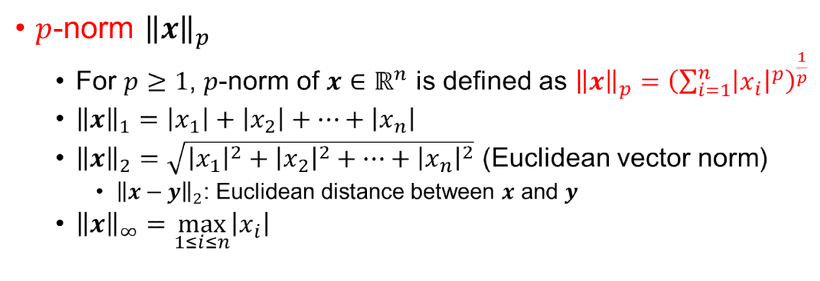

In [ ]:
# x
# - norm 구하려는 배열
# - axis가 none이면 x는 1차원이나 2차원

# axis {정수, 정수 튜플 2개, None}
# - 기본값은 none으로 행렬 norm 또는 벡터 norm을 찾음
# - 정수일 경우 백터 노름을 계산할 x축 지정
# - 2 튜플이면 행렬 norm 반환

In [ ]:
# Get angle using arcos of dot product
angle = np.arccos(np.einsum('nt, nt->n', # np.einsum 행렬 표기
                            v[[0,1,2,4,5,6,8,9,10,12,13,14,16,17,18], :],
                            v[[1,2,3,5,6,7,9,10,11,13,14,15,17,18,19], :]))
# [15,]

In [ ]:
angle = np.degrees(angle) # Convert radian to degree

#### ndarray로 변환 후 라벨 추가

In [ ]:
angle_label = np.array([angle], dtype=np.float32)
angle_label = np.append(angle_label, idx) # 각 데이터에 라벨 추가

In [ ]:
d = np.concatenate([joint.flatten(), angle_label]) # 각도 배열과 라벨 배열을 합침

In [ ]:
data.append(d) # 데이터에 각도와 라벨 합친 array 추가

<br>

### 웹캠 종료 후

#### 데이터셋 생성

In [ ]:
full_seq_data = []
for seq in range(len(data) - seq_length):
    full_seq_data.append(data[seq : seq + seq_length])

In [ ]:
full_seq_data = np.array(full_seq_data)